# Project: Explore Weather Trends
***Muthukumar Palavesam***

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, local and global temperature data has been analyzed and the temperature trends in Bangalore, India has been compared to overall global temperature trends.

> In this project I will go ahead and explore the answers for the below questions:<br>
> - Which Month the min and max temp had registered in city and global?
> - How the temp trends look like?

In [1]:
#import the necessary package for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Explore General Properties of the Dataset

In [2]:
#Load Data using pandas "read_csv"
city_data=pd.read_csv('city_data.csv')
city_list=pd.read_csv('city_list.csv')
global_data=pd.read_csv('global_data.csv')

In [3]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
year        71311 non-null int64
city        71311 non-null object
country     71311 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [4]:
city_data.head(2)

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52


In [5]:
city_list.head(2)

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates


In [6]:
global_data.head(2)

,year,avg_temp
0,1750,8.72
1,1751,7.98


In [7]:
city_list['country'].unique()

array(["Côte D'Ivoire", 'United Arab Emirates', 'Nigeria', 'Ghana',
       'Turkey', 'Australia', 'India', 'United States', 'Egypt',
       'Algeria', 'Kazakhstan', 'Netherlands', 'China', 'Madagascar',
       'Eritrea', 'Greece', 'Iraq', 'Azerbaijan', 'Mali', 'Indonesia',
       'Thailand', 'Central African Republic', 'Spain', 'Venezuela',
       'Colombia', 'Lebanon', 'United Kingdom', 'Serbia', 'Brazil',
       'Libya', 'Germany', 'Switzerland', 'Guinea Bissau', 'Slovakia',
       'Congo', 'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco',
       'Russia', 'Moldova', 'Sri Lanka', 'Guinea', 'Denmark', 'Argentina',
       'Senegal', 'Syria', 'Tanzania', 'Bangladesh', 'Qatar', 'Cameroon',
       'Ireland', 'South Africa', 'Tajikistan', 'Mexico', 'Pakistan',
       'Sierra Leone', 'Botswana', 'Guyana', 'Guatemala', 'Ecuador',
       'Vietnam', 'Zimbabwe', 'Finland', 'Japan', 'Sudan', 'Afghanistan',
       'Uganda', 'Taiwan', 'Nepal', 'Ukraine', 'Rwanda', 'Canada',
       'Jamaica', 

In [8]:
list(city_list.query('country=="India"')['city'])

['Agra',
 'Ahmadabad',
 'Allahabad',
 'Amritsar',
 'Bangalore',
 'Bhopal',
 'Delhi',
 'Haora',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Kanpur',
 'Ludhiana',
 'Nagpur',
 'New Delhi',
 'Patna',
 'Pune',
 'Rajkot',
 'Ranchi',
 'Surat',
 'Vadodara',
 'Varanasi']

### Data Cleaning

> - In this I want to delete duplicates
> - Replace the NaN into suitable values
> - Renaming the column
> - Merging the records
> - Going to calculate the 9 yr moving Avg
> - Adding the column if needed
> - Save the cleaned Data

#### Data Cleaning - `Saving the Bangalore city data`

In [9]:
df=city_data.query('city=="Bangalore"')
df.to_csv('city_data_bangalore.csv',index=False)

In [10]:
city_data_bangalore=pd.read_csv('city_data_bangalore.csv')
city_data_bangalore.head()

,year,city,country,avg_temp
0,1796,Bangalore,India,24.49
1,1797,Bangalore,India,25.18
2,1798,Bangalore,India,24.65
3,1799,Bangalore,India,24.81
4,1800,Bangalore,India,24.85


#### Data Cleaning - `Checking Duplicate Records`

In [11]:
print("City Data Duplicate Records:{}".format(sum(city_data.duplicated())))
print("City List Duplicate Records:{}".format(sum(city_data.duplicated())))
print("Global Data Duplicate Records:{}".format(sum(city_data.duplicated())))

City Data Duplicate Records:0
City List Duplicate Records:0
Global Data Duplicate Records:0


#### Data Cleaning - `Checking NaN Records`

In [12]:
city_data_bangalore.shape

(218, 4)

In [13]:
city_data_null_counts= city_data_bangalore.isnull().sum()
print("City Data Null Counts:{}")
city_data_null_counts[city_data_null_counts>0]

City Data Null Counts:{}


avg_temp    7
dtype: int64

In [14]:
global_data_null_counts= global_data.isnull().sum()
print("Global Data Null Counts:")
global_data_null_counts[global_data_null_counts>0]

Global Data Null Counts:


Series([], dtype: int64)

In [15]:
#From Above the city data is having 2547 null records in Avg_temp column. So Going to replace the NaN into mean avg
city_data_bangalore['avg_temp'].fillna(city_data_bangalore['avg_temp'].mean(),inplace=True)

In [16]:
#Recheck the NUll counts
city_data_null_counts= city_data_bangalore.isnull().sum()
print("City Data Null Counts:{}")
city_data_null_counts[city_data_null_counts>0]

City Data Null Counts:{}


Series([], dtype: int64)

#### Data Cleaning - `Rename column`

In [17]:
city_data_bangalore.rename(columns={'avg_temp':'city_avg_temp'},inplace=True)
global_data.rename(columns={'avg_temp':'global_avg_temp'},inplace=True)

In [18]:
city_data_bangalore.head(1)

,year,city,country,city_avg_temp
0,1796,Bangalore,India,24.49


In [19]:
global_data.head(1)

,year,global_avg_temp
0,1750,8.72


#### Data Cleaning - `Merging the data Frame`

In [20]:
merged_data=pd.merge(city_data_bangalore,global_data,how='left',on=['year','year'])

In [21]:
merged_data.head()

,year,city,country,city_avg_temp,global_avg_temp
0,1796,Bangalore,India,24.49,8.27
1,1797,Bangalore,India,25.18,8.51
2,1798,Bangalore,India,24.65,8.67
3,1799,Bangalore,India,24.81,8.51
4,1800,Bangalore,India,24.85,8.48


In [22]:
merged_data.insert(4,'city_9yr_moving_avg',merged_data['city_avg_temp'].rolling(window=9).mean())
merged_data.insert(6,'global_9yr_moving_avg',merged_data['global_avg_temp'].rolling(window=9).mean())

In [23]:
merged_data.head(15)

,year,city,country,city_avg_temp,city_9yr_moving_avg,global_avg_temp,global_9yr_moving_avg
0,1796,Bangalore,India,24.490000,NaN,8.27,NaN
1,1797,Bangalore,India,25.180000,NaN,8.51,NaN
2,1798,Bangalore,India,24.650000,NaN,8.67,NaN
3,1799,Bangalore,India,24.810000,NaN,8.51,NaN
4,1800,Bangalore,India,24.850000,NaN,8.48,NaN
5,1801,Bangalore,India,24.490000,NaN,8.59,NaN
6,1802,Bangalore,India,25.440000,NaN,8.58,NaN
7,1803,Bangalore,India,25.220000,NaN,8.50,NaN
8,1804,Bangalore,India,25.670000,24.977778,8.84,8.550000
9,1805,Bangalore,India,25.010000,25.035556,8.56,8.582222


#### Data Cleaning - `Saving merged cleaned data`

In [24]:
merged_data.to_csv('cleaned_data.csv',index=False)

In [25]:
cleaned_data=pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,year,city,country,city_avg_temp,city_9yr_moving_avg,global_avg_temp,global_9yr_moving_avg
0,1796,Bangalore,India,24.49,NaN,8.27,NaN
1,1797,Bangalore,India,25.18,NaN,8.51,NaN
2,1798,Bangalore,India,24.65,NaN,8.67,NaN
3,1799,Bangalore,India,24.81,NaN,8.51,NaN
4,1800,Bangalore,India,24.85,NaN,8.48,NaN


<a id='eda'></a>
## Exploratory Data Analysis

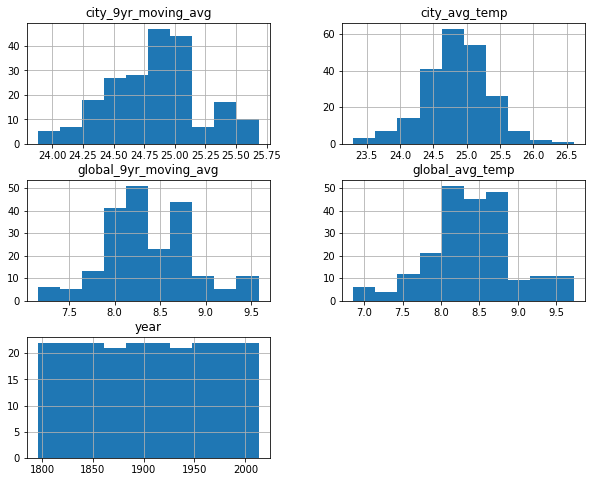

In [26]:
#Exploring the histogram of the data
cleaned_data.hist(figsize=(10,8));

### Research Question 1 : How differ the Global vs bangalore City Avg Temp?

In [27]:
#getting column index
for i,v in enumerate (cleaned_data.columns):
    print(i,v)

0 year
1 city
2 country
3 city_avg_temp
4 city_9yr_moving_avg
5 global_avg_temp
6 global_9yr_moving_avg


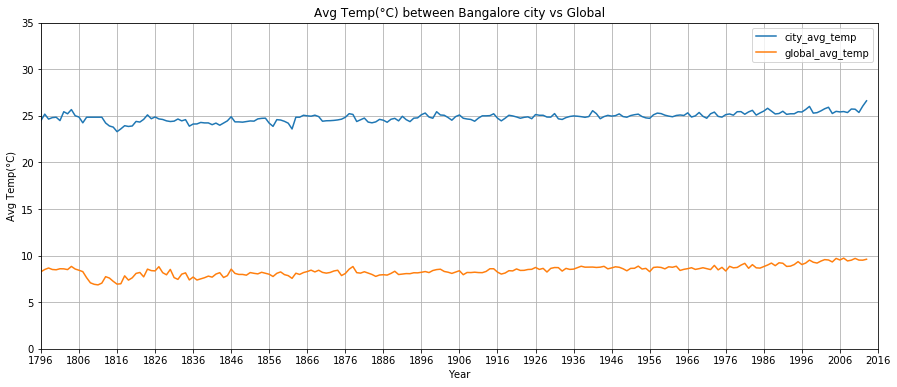

In [28]:
#Avg Temp in bangalore Vs Global
cleaned_data.plot(xticks=np.arange(1796,2020,10),yticks=np.arange(0,40,5),\
                  x='year',y=['city_avg_temp','global_avg_temp'],figsize=(15,6),grid=True);

#set the labels and titles of the plot.
plt.title('Avg Temp(°C) between Bangalore city vs Global');
plt.xlabel('Year');
plt.ylabel('Avg Temp(°C)');

> - From this above plot, whet we are seeing is the city avg temp is higher than the global Avg Temp.

### Research Question 2 : How differ the Global vs bangalore City 9 year moving Avg Temp?

In [29]:
#Top5 highest bangalore 9 year moving Avg Temp
cleaned_data.iloc[:,np.r_[0,4:5]].\
                   sort_values(by=['city_9yr_moving_avg'],ascending=False).head().round(2).style.hide_index()

year,city_9yr_moving_avg
2013,25.68
2003,25.6
2005,25.58
2004,25.58
2010,25.56


In [30]:
#Top5 highest global 9 year moving Avg Temp
cleaned_data.iloc[:,np.r_[0,6:7]].sort_values(by=['global_9yr_moving_avg'],ascending=False).\
head().round(2).style.hide_index()

year,global_9yr_moving_avg
2013,9.58
2010,9.56
2011,9.55
2012,9.55
2009,9.53


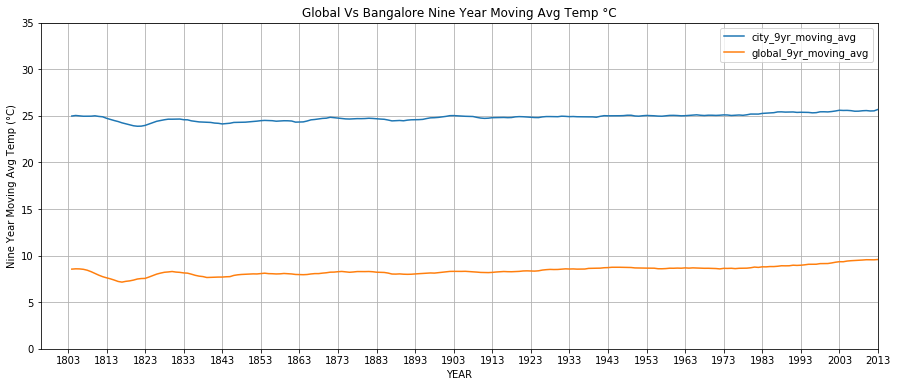

In [31]:
cleaned_data.plot(xticks=np.arange(1803,2020,10),yticks=np.arange(0,40,5),\
                  x='year',y=['city_9yr_moving_avg','global_9yr_moving_avg'],figsize=(15,6),grid=True);

#set the labels and titles of the plot.
plt.title('Global Vs Bangalore Nine Year Moving Avg Temp °C');
plt.xlabel('YEAR');
plt.ylabel('Nine Year Moving Avg Temp (°C)');
plt.legend(loc='upper right');

### Research Question 3 : Top five Highest Global and Bangalore city Avg Temp

In [32]:
#Top5 highest bangalore avg Temp
cleaned_data.iloc[:,np.r_[0,3:4]].sort_values(by=['city_avg_temp'],ascending=False).head().style.hide_index()

year,city_avg_temp
2013,26.61
2012,26.04
1998,26.01
2003,25.92
1987,25.81


In [33]:
#Top5 highest global avg Temp
cleaned_data.iloc[:,np.r_[0,5:6]].sort_values(by=['global_avg_temp'],ascending=False).head().style.hide_index()

year,global_avg_temp
2007,9.73
2005,9.7
2010,9.7
2013,9.61
2002,9.57


### Research Question 4 : Top Five Lowest Global and Bangalore city Avg Temp

In [34]:
#Top5 lowest bangalore avg Temp
cleaned_data.iloc[:,np.r_[0,3:4]].sort_values(by=['city_avg_temp']).head().style.hide_index()

year,city_avg_temp
1816,23.3
1862,23.59
1817,23.6
1815,23.79
1819,23.86


In [35]:
#Top5 lowest global avg Temp
cleaned_data.iloc[:,np.r_[0,5:6]].sort_values(by=['global_avg_temp']).head().style.hide_index()

year,global_avg_temp
1811,6.86
1810,6.92
1816,6.94
1817,6.98
1812,7.05


### Research Question 5 : Top Five Highest Global and Bangalore city 9Yr Moving Avg Temp

In [36]:
#Top5 highest bangalore 9Yr Moving Avg Temp
cleaned_data.iloc[:,np.r_[0,4:5]].sort_values(by=['city_9yr_moving_avg'],ascending=False).\
head().round(2).style.hide_index()

year,city_9yr_moving_avg
2013,25.68
2003,25.6
2005,25.58
2004,25.58
2010,25.56


In [37]:
#Top5 highest global 9Yr Moving Avg Temp
cleaned_data.iloc[:,np.r_[0,6:7]].sort_values(by=['global_9yr_moving_avg'],ascending=False).\
head().round(2).style.hide_index()

year,global_9yr_moving_avg
2013,9.58
2010,9.56
2011,9.55
2012,9.55
2009,9.53


### Research Question 6 : Top Five Lowest Global and Bangalore city 9Yr Moving Avg Temp

In [38]:
#Top5 lowest bangalore 9Yr Moving Avg Temp
x=cleaned_data.iloc[:,np.r_[0,4:5]].sort_values(by=['city_9yr_moving_avg']).head().round(2).style.hide_index()

In [39]:
#Top5 lowest global 9Yr Moving Avg Temp
y=cleaned_data.iloc[:,np.r_[0,6:7]].sort_values(by=['global_9yr_moving_avg']).head().round(2).style.hide_index()

In [40]:
#https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
#https://groups.google.com/forum/#!topic/pydata/znrMEQoDtxg

from IPython.display import display
print('Top5 lowest bangalore 9Yr Moving Avg Temp')
display(x)
#print('\n')
print('Top5 lowest global 9Yr Moving Avg Temp')
display(y)


Top5 lowest bangalore 9Yr Moving Avg Temp


year,city_9yr_moving_avg
1821,23.88
1822,23.89
1820,23.93
1823,23.97
1819,24.04


Top5 lowest global 9Yr Moving Avg Temp


year,global_9yr_moving_avg
1817,7.16
1816,7.23
1818,7.24
1819,7.29
1820,7.37


<a id='conclusions'></a>
## Conclusions

> - If comparing the Global average temperature and Bangalore average temperature then the Bangalore city is hotter than Global average temperature.
> - Minimum Average Temperature recorded in Bangalore as 23.3 °C in 1816 and Maximum Average Temp recorded as 26.61 °C in 2013
> - Minimum Average Temperature recorded in Global as 6.94 °C in 1816 and Maximum Average Temp recorded as 9.73 °C in 2007
> - Both Bangalore and Global average temperature lines have the similar kind of trends. During early years, both trends seems to have ups and downs then approx. around 1992 the moving average temperature starts to increase at a steady rate.
> - Both graphs show increase in average temperature with time, which means earth is getting hotter.
> - we can see that eventually the graph is moving upwards which means the global temperature is rising which is directly proportional to increase in temperatures of the city.